https://gist.github.com/emiliom/57e84aee123ca60c4fa3

## Accessing a NERRS station with Pyoos, via CDMO SOAP web services
Illustrates querying all stations ("features") from a NERRS Reserve site; access to data from a NERRS station (specified by its station code); extraction of station metadata; and conversion of the returned multi-variable time series to a pandas DataFrame, followed by a time series plot from the DataFrame. Builds off the work from Dan Ramage (SECOORA), whose code is listed in the last cell, at the end. _Note that this is running from a pyoos fork with some small but key changes to the nerrs collector._ 2014 May 8-10. Emilio Mayorga.

In [1]:
from datetime import datetime, timedelta
import pandas as pd
from pyoos.collectors.nerrs.nerrs_soap import NerrsSoap

In [2]:
# FROM pyoos SOS handling
# Convenience function to build record style time series representation
def flatten_element(p):
    rd = {'time':p.time}
    for m in p.members:
        rd[m['standard']] = m['value']
    return rd

# sta.get_unique_members() serves the same function as the pyoos SOS get_unique_members method
# Convenience function to extract a dict of unique members (observed properties) by standard name
obsprops_bystdname = lambda sta: {m['standard']:m for m in sta.get_unique_members()}

### First here's a very compact set of statements to get and plot the data for a station. No exploratory side trips.

**NOTE:** I manually removed (commented out) the NERRS/CDMO access token after running this notebook, before uploading notebook to my github gist. *Replace 'TOKEN STRING' with a [token obtained from the NERRS/CDMO office](http://nerrsdata.org/contact.cfm)*

In [3]:
# NERRS/CDMO access token.
accesstoken = 'TOKEN STRING'

# Initialize pyoos NERRS collector object
nerrsData = NerrsSoap()

In [4]:
# Access pdbpfmet station, for the last 7 days (roughly)
nerrsData.filter(features=['pdbpfmet'],
                  start=datetime.utcnow() - timedelta(days=7),
                  end=datetime.utcnow()  - timedelta(hours=12))

response = nerrsData.collect(accesstoken)

In [5]:
sta = response.elements[0]
obsprops_bystdname_dict = obsprops_bystdname(sta)

In [6]:
# FROM pyoos SOS handling
# For first (and only) station
flattenedsta_0 = map(flatten_element, sta.elements)
sta_0df = pd.DataFrame.from_records(flattenedsta_0, index=['time'])
sta_0df.head()

,air_pressure,air_temperature,cumulative_precipitation,relative_humidity,total_par_LiCor,total_precipitation,wind_direction_from_true_north,wind_direction_standard_deviation,wind_sped,wind_speed_of_gust
time,,,,,,,,,,
2014-05-10 19:30:00+00:00,1021,12.1,0,81,651,0,212,22,1.8,3.1
2014-05-10 19:15:00+00:00,1021,11.6,0,83,462,0,192,17,2.0,3.7
2014-05-10 19:00:00+00:00,1021,11.4,0,83,394,0,189,12,2.2,4.1
2014-05-10 18:45:00+00:00,1021,11.4,0,84,451,0,193,14,2.0,3.8
2014-05-10 18:30:00+00:00,1021,11.3,0,83,420,0,202,15,2.0,4.0


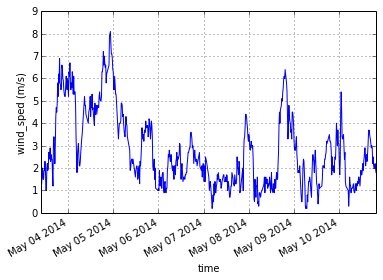

In [7]:
# Time series plot.
# "wind_speed" is currently mispelled; that's in pyoos, and can be fixed easily
obsprop_name = 'wind_sped'
obsprop = obsprops_bystdname_dict[obsprop_name]
sta_0df[obsprop_name].plot()
ylabel(obsprop_name + ' ('+obsprop['unit']+')');

### Now the same thing, but with lots of exploration in between

In [8]:
# pyoos NERRS collector
nerrsData = NerrsSoap()

#### _May 10:_ Not sure if this will work, b/c the access token is passed via the collect method, so it hasn't been passed here yet!

In [9]:
# Get all Padilla Bay stations (pdb)
[featureid for featureid in nerrsData.list_features() if featureid.startswith('pdb')]

['pdbbpnut',
 'pdbbpwq',
 'pdbbynut',
 'pdbbywq',
 'pdbgdnut',
 'pdbgsnut',
 'pdbgswq',
 'pdbjenut',
 'pdbjewq',
 'pdbjlnut',
 'pdbjlwq',
 'pdbnnwq',
 'pdbpfmet']

In [10]:
# Access pdbpfmet station, for the last 7 days (roughly)
nerrsData.filter(features=['pdbpfmet'],
                  start=datetime.utcnow() - timedelta(days=7),
                  end=datetime.utcnow()  - timedelta(hours=12))
#nerrsData.filter(variables=["ATemp"])
response = nerrsData.collect()

In [11]:
# The raw response (a string) is not used outside this cell. The collect method response is what's used
# I'm showing the raw response here, just for reference
raw = nerrsData.raw()
type(raw), raw.keys()

(dict, ['pdbpfmet'])

In [12]:
# response.elements is a one-element array with a paegan.cdm.dsg.features.station.Station element
response.elements

In [13]:
# Looks like the station in the response doesn't include any info about the Reserve it belongs to. Too bad.
# Or is one of the pieces of information below the NERRS site?
sta = response.elements[0]
sta.__dict__.keys()

['_type',
 '_location',
 '_description',
 '_name',
 '_uid',
 '_elements',
 '_properties']

In [14]:
sta.uid, sta.name, sta.description, sta.type, sta.location, sta.properties

('pdbpfmet',
 'Padilla Bay Farm',
 None,
 'timeSeries',
 <bound method Station.properties of <paegan.cdm.dsg.features.station.Station object at 0x4848a50>>)

In [15]:
# 'siteid' and 'location_description' seem to refer to the NERRS reserve/site
sta.get_property('siteid'), sta._properties

('pdb',
 {'horizontal_crs': 'EPSG:4326',
  'location_description': 'Padilla Bay',
  'siteid': 'pdb',
  'state': 'wa',
  'vertical_crs': 'EPSG:4297',
  'vertical_units': 'm'})

In [16]:
staloc = sta.get_location()
print staloc, '||', staloc.type, '||', staloc.xy

POINT Z (122.469303 48.463847 0) || Point || (array('d', [122.469303]), array('d', [48.463847]))


In [17]:
obsprops_bystdname_dict = obsprops_bystdname(sta)
obsprops_bystdname_dict['wind_sped']

{'description': 'WSpd', 'name': 'WSpd', 'standard': 'wind_sped', 'unit': 'm/s'}

In [18]:
# The individual observations are returned in the station "elements"
stael = sta.elements
type(stael), len(stael)

(list, 656)

In [19]:
stael0 = stael[0]
stael0.time
# See sta.get_unique_members(), above
# stael0.get_member_names() returns a list of member names for this station 'element'

datetime.datetime(2014, 5, 10, 19, 30, tzinfo=<UTC>)

In [20]:
stael0.members

[{'description': 'ATemp',
  'name': 'ATemp',
  'standard': 'air_temperature',
  'unit': '\xc2\xb0C',
  'value': 12.1},
 {'description': 'BP',
  'name': 'BP',
  'standard': 'air_pressure',
  'unit': 'mb',
  'value': 1021.0},
 {'description': 'CumPrcp',
  'name': 'CumPrcp',
  'standard': 'cumulative_precipitation',
  'unit': 'mm',
  'value': 0.0},
 {'description': 'MaxWSpd',
  'name': 'MaxWSpd',
  'standard': 'wind_speed_of_gust',
  'unit': 'm/s',
  'value': 3.1},
 {'description': 'RH',
  'name': 'RH',
  'standard': 'relative_humidity',
  'unit': '%',
  'value': 81.0},
 {'description': 'SDWDir',
  'name': 'SDWDir',
  'standard': 'wind_direction_standard_deviation',
  'unit': 'sd',
  'value': 22.0},
 {'description': 'TotPAR',
  'name': 'TotPAR',
  'standard': 'total_par_LiCor',
  'unit': 'mmoles/m^2',
  'value': 651.0},
 {'description': 'TotPrcp',
  'name': 'TotPrcp',
  'standard': 'total_precipitation',
  'unit': 'mm',
  'value': 0.0},
 {'description': 'Wdir',
  'name': 'Wdir',
  'standa

In [21]:
# From paegan: flatten Returns a Generator of Points that are part of this collection
# Just exploring what this does...
response.flatten

<bound method StationCollection.flatten of <paegan.cdm.dsg.collections.station_collection.StationCollection object at 0x4848f90>>

In [22]:
# FROM pyoos SOS handling
# For first (and only) station
flattenedsta_0 = map(flatten_element, sta.elements)
sta_0df = pd.DataFrame.from_records(flattenedsta_0, index=['time'])
sta_0df.head()

,air_pressure,air_temperature,cumulative_precipitation,relative_humidity,total_par_LiCor,total_precipitation,wind_direction_from_true_north,wind_direction_standard_deviation,wind_sped,wind_speed_of_gust
time,,,,,,,,,,
2014-05-10 19:30:00+00:00,1021,12.1,0,81,651,0,212,22,1.8,3.1
2014-05-10 19:15:00+00:00,1021,11.6,0,83,462,0,192,17,2.0,3.7
2014-05-10 19:00:00+00:00,1021,11.4,0,83,394,0,189,12,2.2,4.1
2014-05-10 18:45:00+00:00,1021,11.4,0,84,451,0,193,14,2.0,3.8
2014-05-10 18:30:00+00:00,1021,11.3,0,83,420,0,202,15,2.0,4.0


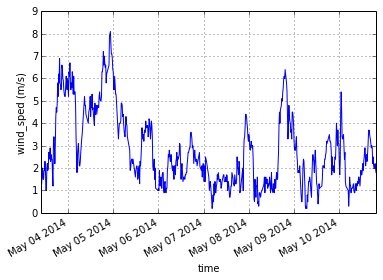

In [23]:
# Time series plot.
# "wind_speed" is currently mispelled; that's in pyoos, and can be fixed easily
obsprop_name = 'wind_sped'
obsprop = obsprops_bystdname_dict[obsprop_name]
sta_0df[obsprop_name].plot()
ylabel(obsprop_name + ' ('+obsprop['unit']+')');

### The block below is Dan's code, with some tweaks I had made. I'm no longer using it directly

**Change this to return arrays and/or pandas data frames that pull out individual time series per variable**  
**SEE THE CELL ABOVE THIS ONE!**  

for obsRec in response:
  for stationRec in response.get_elements():
      #stationRec = obsRec.feature
      print "**** Station: %s Location: %s" % (stationRec.name, stationRec.get_location())
      #The elements are a list of the observed_properties returned wrapped in a Point object.
      for obsProp in stationRec.get_elements():
        print "  -------------------"
        print "  - Observation Date/Time: %s" % (obsProp.get_time())
        #print "Member names: %s" % (obsProp.get_member_names())
        #I think that for a multi sensor request, there should be multiple members, each representing
        #a specific observed_property.
        for member in obsProp.get_members():
            #Apparently you're going to have to know how each collector parses the pieces of the data.
            #For an SOS query, there appear to be: name, units, value, and standard(CF MMI link).
            #print "    ------\n    member.keys() = %s" % member.keys()
            # member.keys() = ['value', 'description', 'name', 'unit', 'standard']
            m = member
            member_values_tup = (m['name'], m['description'], m['standard'], m['value'], m['unit'])
            print "name: %s (description=%s, standard=%s); value=%s, unit=%s" % member_values_tup
            #for key,value in member.iteritems():
            #    print "    %s = %s" % (key, value)